In [1]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [2]:
def frac(x,pos):
    num = int(x*15)
    return fr"$\frac{{{num}}}{{15}}$" if num > 0 else "0"

In [3]:
val = []
for n in np.linspace(0, 1/3 , 1000):
    val.append(realign_log(rhob(n,generate_bell_states())))

In [50]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]
xi05 = 0.5
xi08 = 0.8
xi1 = 1

In [51]:
val_05 = realign_val_12_21(e,xi05,momentum1,momentum2)
val_08 = realign_val_12_21(e,xi08,momentum1,momentum2)
val_1 = realign_val_12_21(e,xi1,momentum1,momentum2)

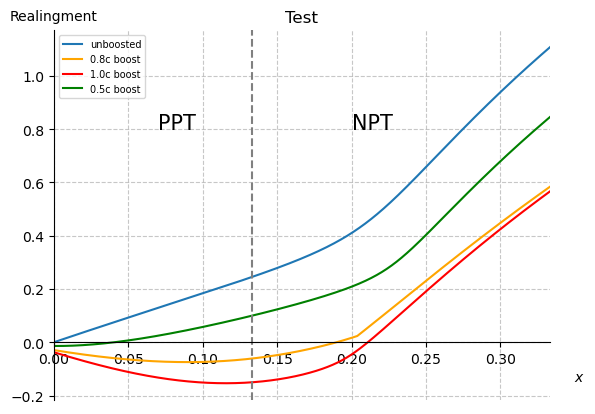

In [52]:
fig, ax = plt.subplots()
#ax.xlim(0,1/3)
#ax.ylim(-0.2)
ax.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), val_08, color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), val_1, color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), val_05, color = "green",label="0.5c boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = "Test",
       xlabel=r"$x$")
ax.set_ylabel("Realingment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.xaxis.set_major_locator(MultipleLocator(1/15))
#ax.xaxis.set_major_formatter(FuncFormatter(frac))

In [7]:
momhilbert1 = np.array([1,0])
momhilbert2 = np.array([0,1])

theta = 7*np.pi/5

valt_05 = realign_val_theta2(e,xi05,momentum1,momentum2,theta)
valt_08 = realign_val_theta2(e,xi08,momentum1,momentum2,theta)
valt_1 = realign_val_theta2(e,xi1,momentum1,momentum2,theta)

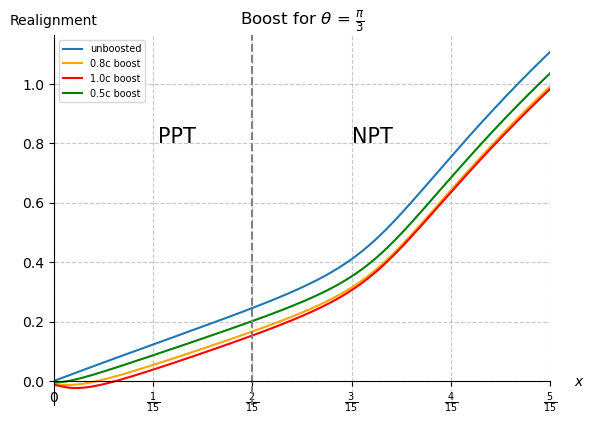

In [8]:
fig, ax = plt.subplots()
#ax.xlim(0,1/3)
#ax.ylim(-0.2)
ax.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), valt_08, color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), valt_1, color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), valt_05, color = "green",label="0.5c boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = fr"Boost for $\theta$ = $\frac{{\pi}}{{3}}$",
       xlabel=r"$x$")
ax.set_ylabel("Realignment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(1/15))
ax.xaxis.set_major_formatter(FuncFormatter(frac))

NameError: name 'handles' is not defined

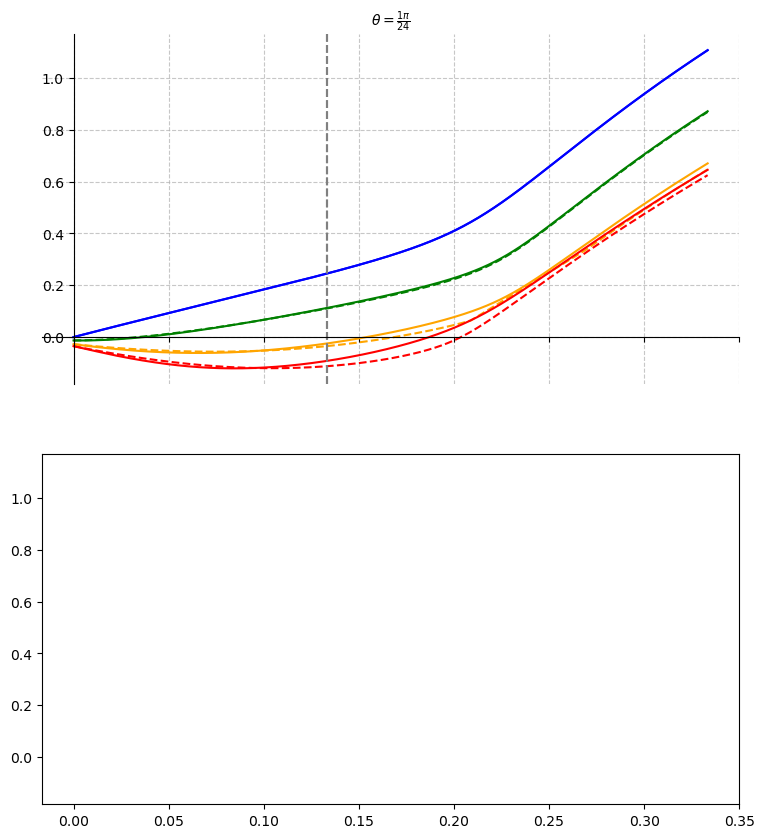

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Function to format axis ticks as fractions
def frac(x, pos):
    """Format axis ticks as fractions."""
    n, d = (2 * x).as_integer_ratio()  # Convert to fraction
    if d == 1:
        return f"${n}$"
    else:
        return f"${n}/{d}$"

# Energy and momentum example values
e = [0, 0, 1]  # Energy
momentum1 = np.array([2, np.sqrt(3), 0,0])  # Example momentum1
momentum2 = np.array([2, -np.sqrt(3), 0,0])  # Example momentum2
xi_values = [0.5, 0.8, 1.0]  # xi values

# Generate 10 values for theta
#theta_values = np.linspace(0, np.pi/2, 13)
theta_values = [5*np.pi/24,7*np.pi/24]
# Create subplots: 2 rows, 5 columns
fig, axes = plt.subplots(len(theta_values), 1, figsize=(9, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop over theta values and subplots
for i, theta in enumerate(theta_values):
    ax = axes[0]

    # Compute values for this theta and xi by calling the realign_val_theta2 function
    valt_05= realign_val_theta2(e, xi_values[0], momentum1, momentum2, theta)
    valt_08= realign_val_theta2(e, xi_values[1], momentum1, momentum2, theta)
    valt_1 = realign_val_theta2(e, xi_values[2], momentum1, momentum2, theta)
        
        # Plot the results for the various boosts
    ax.plot(np.linspace(0, 1/3, 1000), val, label=f"Unboosted (xi=0)", color="blue")
    ax.plot(np.linspace(0, 1/3, 1000), valt_05, label=f"0.5c boost (xi={xi_values[0]})", color="green", linestyle="--" if i == 0 else "-")
    ax.plot(np.linspace(0, 1/3, 1000), valt_08, label=f"0.8c boost (xi={xi_values[1]})", color="orange",linestyle="--" if i == 0 else "-")
    ax.plot(np.linspace(0, 1/3, 1000), valt_1, label=f"1.0c boost (xi={xi_values[2]})", color="red",linestyle="--" if i == 0 else "-")
    
    # Set title for this subplot
    ax.set_title(fr"$\theta = \frac{{{i}\pi}}{{24}}$", fontsize=10)

    # Customize the plot
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ax.axvline(2/15, linestyle = "--", color = "grey")
    ax.spines["left"].set_position(("data",0))
    ax.spines["bottom"].set_position(("data",0))
    
# Add a single legend and labels for the figure
#handles, labels = axes[11].get_legend_handles_labels()
#
fig.legend(handles, labels, loc="upper center", fontsize=12, ncol=4, bbox_to_anchor=(0.5, 1.02))

fig.text(0.5, 0.04, r"$x$", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Realignment", va="center", rotation="vertical", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
psi = -np.pi/4
val_negative = realign_val_theta2(e,xi05,momentum1,momentum2,psi)

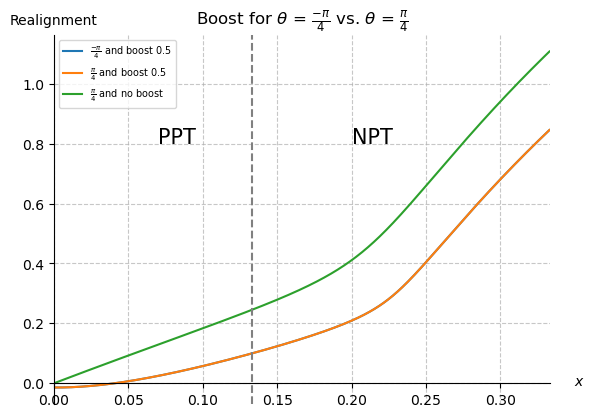

In [11]:
fig,ax = plt.subplots()
ax.plot(np.linspace(0,0.333,1000),val_negative,label=fr"$\frac{{-\pi}}{{4}}$ and boost 0.5")
ax.plot(np.linspace(0,0.333,1000),val_05,label=fr"$\frac{{\pi}}{{4}}$ and boost 0.5")
ax.plot(np.linspace(0,0.333,1000),val, label=fr"$\frac{{\pi}}{{4}}$ and no boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = fr"Boost for $\theta$ = $\frac{{-\pi}}{{4}}$ vs. $\theta$ = $\frac{{\pi}}{{4}}$",
       xlabel=r"$x$")
ax.set_ylabel("Realignment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.xaxis.set_major_locator(MultipleLocator(1/15))
#ax.xaxis.set_major_formatter(FuncFormatter(frac))

In [12]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]

In [13]:
akl = np.array([
    [0,2/9,2/9],
    [0,2/9,1/18],
    [5/18,0,0]],
    dtype=np.complex128
)

bell_states = generate_bell_states()

def rho2spin(bell):
    sum = np.zeros(9,dtype=np.complex128)
    for k in range(3):
        for j in range(3):
            sum += akl[k][j]*bell[k][j]
    return sum

In [14]:
rho1 = rhob(7/60,bell_states)

In [15]:
k1 = np.array([1,0])
k2 = np.array([0,1])
k1k2 = np.kron(k1,k2)
rho2mom = np.outer(k1k2,k1k2)
rho2 = rho2spin(bell_states)

In [25]:
values = []
ppt = []
mini = []
for x in np.arange(0,1,0.02):
    for i in np.linspace(0,1,50):
        values.append(realign_general(e,x,momentum1,momentum2,rho1,rho2,(np.pi/4),0,i)[0])
    mini.append(min(values))
    values = []
#print(mini)
#print(values[0])

In [26]:
print(mini)

[3.203426503814917e-16, 6.406853007629834e-16, 9.61027951144475e-16, 1.2813706015259665e-15, 6.406853007629834e-16, 3.203426503814917e-16, 6.406853007629834e-16, 9.61027951144475e-16, 6.406853007629834e-16, 9.61027951144475e-16, 6.406853007629834e-16, 6.406853007629834e-16, 9.61027951144475e-16, 6.406853007629834e-16, 9.61027951144475e-16, 1.2813706015259665e-15, 9.61027951144475e-16, 0.0, 6.406853007629834e-16, 9.61027951144475e-16, 0.0, 0.0, 0.0, 0.0, 6.406853007629834e-16, 6.406853007629834e-16, 3.203426503814917e-16, 9.61027951144475e-16, 6.406853007629834e-16, 9.61027951144475e-16, 0.0, -0.003531568224423919, -0.00993680032436224, -0.017471571073456576, -0.025645419174676002, -0.03420165812331247, -0.042997519947918936, -0.05195621979193478, -0.06097957139365712, -0.07003419087612059, -0.07906306101585592, -0.08807810422651645, -0.09697211317867951, -0.10573219838103606, -0.11443805697374668, -0.12300022076323593, -0.13138933975799888, -0.13959632693428964, -0.14761302619027888, -

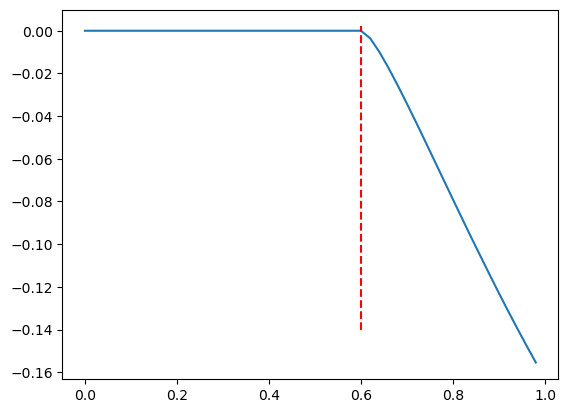

In [27]:
x=np.arange(0,1,0.02)
plt.plot(x,mini)

plt.vlines(0.6,-0.14,0.002,colors="red",linestyles="--")

In [19]:
D(e,0,momentum1)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [20]:
#split up function realign_val so that i can still get the boosted density matrix
#define a 2. function that computes the values of realign. basically last part of realign_val

In [21]:
rho = np.outer(rho2,rho2)
dim = get_dim(rho)

lmd = np.kron((np.ones(dim),np.real(np.trace(rho)) - rho),np.ones(dim))
eig = np.linalg.eigvalsh(lmd)
print(np.any(eig < 0))

#np.linalg.eigvalsh()

True


In [ ]:
def random_density_matrix(dim=3):
    A = np.random.randn(dim, dim) + 1j * np.random.randn(dim, dim)  # Random complex matrix
    rho = A @ A.conj().T  # Make it Hermitian and positive semidefinite
    return rho / np.trace(rho)  # Normalize to make it a valid density matrix

# Generate random 3x3 separable states
num_terms = 3  # Number of separable terms
p = np.random.dirichlet(np.ones(num_terms))  # Random probability distribution

rho_sep = np.zeros((9, 9), dtype=complex)
for i in range(num_terms):
    rho_A = random_density_matrix(3)  # Local state on A
    rho_B = random_density_matrix(3)  # Local state on B
    rho_sep += p[i] * np.kron(rho_A, rho_B)


reduction(rho_sep)

True

In [39]:
list = [5,2,1]
list = list / np.linalg.norm(list)

In [40]:
print(np.linalg.norm(list))

1.0
